## Cloning quasars
- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:

In [2]:
import astropy
#astropy.cosmology.Planck15

In [3]:
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [4]:
#fetch data of quasars
data = fetch_dr7_quasar()
#select the first 10000 points
data = data[:10000]
print(len(data))
z = data['redshift']

10000


## Inverse Transform Sampling

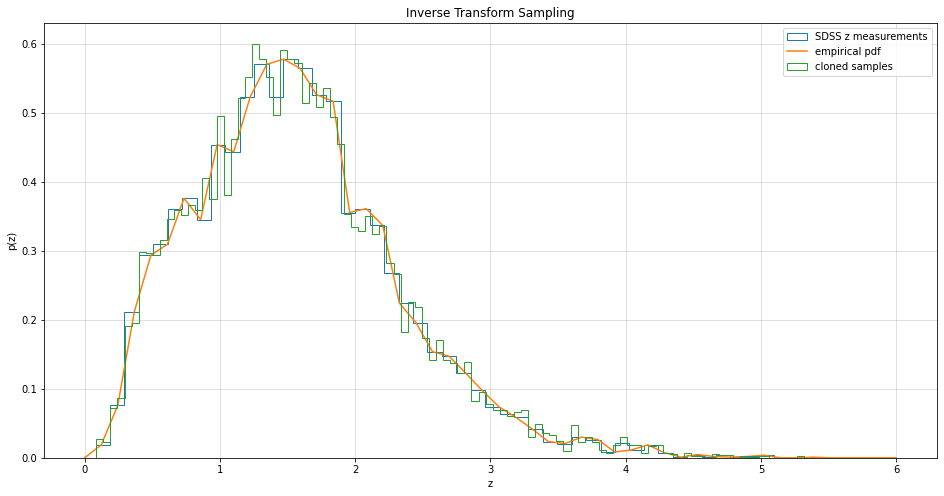

In [5]:
plt.figure(figsize=(16, 8))
plt.xlabel("z")
plt.ylabel("p(z)")

plt.grid(alpha = 0.5)
plt.title("Inverse Transform Sampling")

#plot z measurements
plt.hist(z, bins = 50, density = True, histtype='step', label = 'SDSS z measurements')
hist_params = np.histogram(z, bins = 50)

#Generates a distribution given by a histogram. 
#This is useful to generate a template distribution from a binned datasample.
z_distr = scipy.stats.rv_histogram(hist_params)

#compute the cdf
z_cdf = z_distr.cdf(z)

#percent point function = quantile function = inverse of the cdf
z_quantile = z_distr.ppf(z_cdf)

x = np.linspace(0, 6, 50)

#generate e4 random samples form uniform distribution in [0,1]
u = np.random.uniform(0.00001, 0.999999, int(1e4))

#plot the pdf recovered form binned data
plt.plot(x, z_distr.pdf(x), label = "empirical pdf")

#using the quantile function find the value of x below which a fraction u of the distribution is contained
#plot x values as an estimate of the distribution
plt.hist(z_distr.ppf(u), density = True, bins = 100, histtype='step', label= "cloned samples")

plt.legend()
plt.show()


## Rejection Sampling

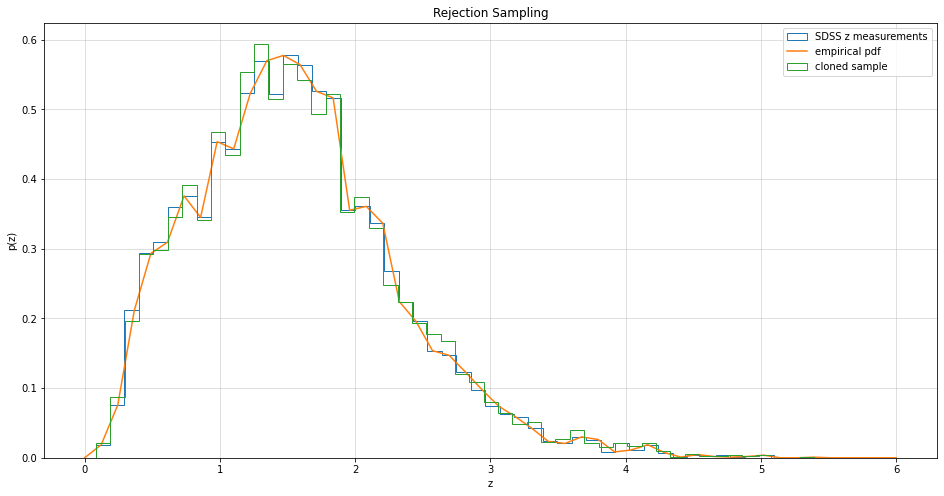

In [7]:
plt.figure(figsize=(16, 8))

h_max = 0.6
g = np.full(len(z), h_max)

#plot sdss data
plt.hist(z, bins = 50, density = True, histtype='step', label = 'SDSS z measurements')
#plot the pdf recovered from binned data
plt.plot(x, z_distr.pdf(x), label = "empirical pdf")

x_mcrej = []
y_mcrej = []

while len(x_mcrej) < len(z):
    #generate random sample for q(x) uniform 
    q_mcrej = np.random.uniform(low=0.0, high=6.0)
    
    #generate random sample in [0, h_max]
    u_mcrej = np.random.uniform(low=0.0, high=h_max)
    
    if u_mcrej < z_distr.pdf(q_mcrej):
        x_mcrej.append(q_mcrej)
        y_mcrej.append(q_mcrej)

plt.hist(x_mcrej, bins = 50, histtype='step', density = True, label = "cloned sample")

plt.xlabel("z")
plt.ylabel("p(z)")
plt.legend()
plt.grid(alpha = 0.5)
plt.title("Rejection Sampling")
plt.show()


In [30]:
# DOI:10.1103/PhysRevD.95.044011
import astropy
from astropy.cosmology import WMAP9 as cosmo
from astropy.constants import c
astropy.cosmology.Planck15

def pdf_qz(z):
    return (4.*np.pi*astropy.cosmology.Planck15.differential_comoving_volume(z).value)

norm = scipy.integrate.quad(pdf_qz, 0, z.max())[0]

print(norm)

2281947447162.5737


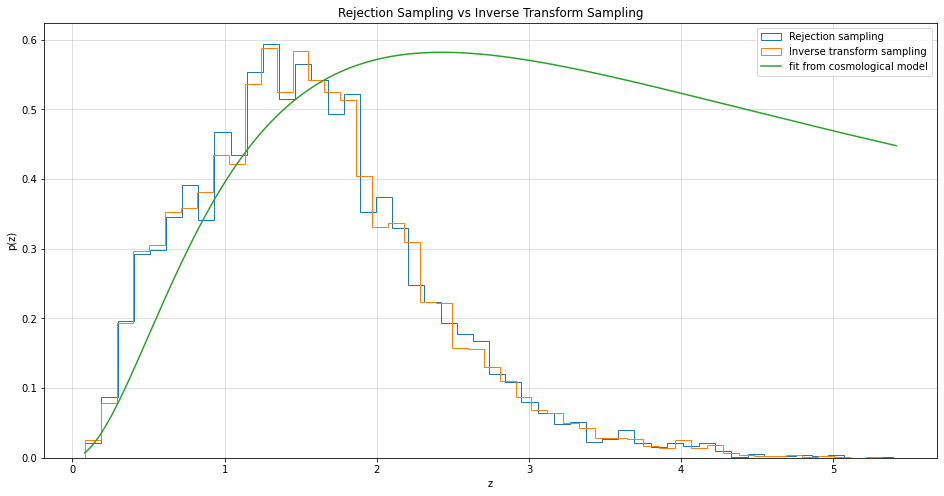

In [31]:
#visually check that the two distributions are similar
plt.figure(figsize=(16, 8))
plt.hist(x_mcrej, bins = 50, histtype='step', density = True, label = "Rejection sampling")
plt.hist(z_distr.ppf(u), density = True, bins = 50, histtype='step', label = "Inverse transform sampling")
plt.plot(np.sort(z), 2.5*pdf_qz(np.sort(z))/(norm), label = 'fit from cosmological model')
plt.xlabel("z")
plt.ylabel("p(z)")
plt.legend()
plt.grid(alpha = 0.5)
plt.title("Rejection Sampling vs Inverse Transform Sampling")
plt.show()